# Exercise 1b: Analysis of global temperatures and $CO_2$ in the last 66 million years

## Introduction

After our look into the historic changes in temperature we are now ready to dive back further in time and look at how climate has changed on our small planet in the last 66 million years. This part of our planet's history is called the [Cenozoic](https://en.wikipedia.org/wiki/Cenozoic). For this exercise we will use the same basic tools as we have used in the previous exercise: looking for long-term trends by fitting trend models, and quantifying the relation between $CO_2$ in the atmosphere and temperature.

## Paleoclimate and proxies
The difference is that instead of looking at actual measurements, we will be using indirect information on climate and $CO_2$ in the geological past. For most of the time there were obviously no humans present to measure temperature or $CO_2$. The dinosaurs were extinct, and the other mammals were lazy and also did not measure temperature. So how can we study climate history? For this scientist rely on studying drill cores from sediments at the bottom of the ocean. Sediments are being deposited continuously in the ocean, and therefore the deeper you drill the older the sediments get. A sediment core is therefore a bit like a time machine into the geological past.

The sediments can not tell you directly what the temperature was at the time they were being deposited. However, scientist have developed methods to measure oxygen isotopes in shells from organisms that lived on the seafloor. Isotopes are atoms with a higher number of neutrons than the regular version of the oxygen atom. The abundance of these isotopes correlates with the temperature of the seafloor. Similarly, other isotopes in these organisms correlate with the pH of the seawater, which in turn correlates with $CO_2$ in the atmosphere. So with data from these drill cores we can reconstruct how temperature and $CO_2$ have changed in the past.


Note that researchers from our university are very active in studying the climate history of our planet. See for instance the [department of Quaternary geology and Paleoclimate](https://www.uib.no/en/rg/quaternary), the [Bjerknes Centre](https://bjerknes.uib.no/en/global-climate-research-theme) and the isotope lab [Farlab](https://www.uib.no/en/FARLAB). You can read up some of their results in [this paper by Nele Meckler](https://www.science.org/doi/full/10.1126/science.abk0604).  

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Planktic_foraminifera_microfossils_from_southern_Maryland.png/800px-Planktic_foraminifera_microfossils_from_southern_Maryland.png" width="400" />

*A close look at some foraminefera, the isotopes in their shells can tell us something about climate. Source: https://en.wikipedia.org/wiki/Foraminifera*

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/All_palaeotemps.svg/800px-All_palaeotemps.svg.png" width="600" />

*Reconstruction of climate history. Source: https://en.wikipedia.org/wiki/Paleoclimatology*

## This exercise

For this exercise you will use the same tools that you have used in exercise 1a to quantify trends and periodic changes in climate. We will start working on analysis of the entire Cenozoic period, or at least the part of the Cenozoic where we have good data, which starts at 56 million years ago. In addition, we will work on the Quaternary period, because it is the period that we live in and lots of interesting things happened to our planet's climate during this period.

<img src="https://stratigraphy.org/ICSchart/ChronostratChart2023-09.jpg" width="600" />

*The subidvision of earth's history into different periods, which is also termed chronostratigraphy. For this exercise we will focus on the Cenozoic and the Quaternary. Source: https://stratigraphy.org/*


## Assignments and handing in this exercise

This exercise contains several assignments, where you either have to complete a code block, or write some text in a text block. These assignments are marked clearly and numbered. Please hand in the assignments by modifying this notebook and handing in the completed notebook file on mitt.uib. You can download the notebook by selecting File > Download > Download .ipynb.

Note that this exercise also contains two bonus assignments. These are not compulsory. They were designed to give you some extra scientific background into the causes of the trends and rhythms that you will find in the paleoclimate data. You can try to work on these bonus assignments if you have time left after completing the compulsory assignments.

---

# Section 1: Paleotemperatures and $CO_2$ data

This first section is devoted to the task of finding paleotemperature and paleo-CO2 data for the Cenozoic.

## 1.1: Paleotemperature data

We will use paleotemperature data published in [2020 by Westerhold et al](https://doi.org/10.1126/science.aba6853). Their estimates of temperature are based on oxygen isotopes from the shells of [foraminifera](https://doi.org/10.1126/science.aba6853), which are organisms that live on the sea floor. The relation between their oxygen isotope composition and deep-sea temperature follows a somewhat complicated and still uncertain relation that depends on the sea ice cover in the past and other factors. [Hansen et al. (2013)](https://doi.org/10.1098/rsta.2012.0294) provided equations to calculate deep-sea temperatures from the isotope data, and to then calculate sea surface temperatures from deep-ocean temperatures. The resulting surface temperatures have been published online in a [data and code repository](https://github.com/SPATIAL-Lab/CenoCO2/) that accompanies a [recent paper](https://doi.org/10.1126/science.adi5177). In this section we will download this data and visualize the temperature history of our planet over the last 66 million years.

First we import the python modules numpy, pandas and matplotlib again:

In [1]:
# import the Python modules numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

next we will read the datafile and change some of the column names to makes them easier to work with:

In [2]:
# specify the location of the dataset
fnt = "https://github.com/SPATIAL-Lab/CenoCO2/raw/main/data/Westerhold.xlsx"

# read the temperature data
dft = pd.read_excel(fnt)

# make new columns for 18O and temperature with simpler names:
dft["d18O"] = dft["benthic d18O VPDB CorrAdjusted"]
dft["dTs"] = dft["GMST (oC)"]

and it is always nice to visualize such data of course, so let's just do that here:

(67.101133, 0.0)

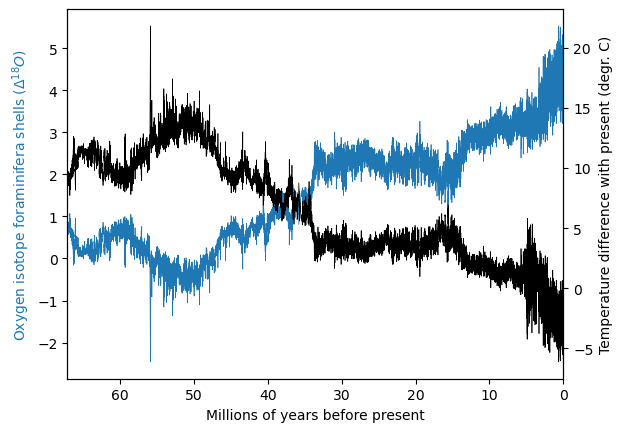

In [3]:
# get the oldest age in the dataset
max_age = dft["age_tuned"].max()

# create a figure with one subplot
fig, ax = pl.subplots(1, 1)

# plot the oxygen isotopes
ax.plot(dft["age_tuned"], dft["d18O"], label=r"$^{18}O", lw=0.5)

# create a second x-axis and plot the paleotemperature data
axr = ax.twinx()
axr.plot(dft["age_tuned"], dft["dTs"], label="Temperature", color="black", lw=0.5)

# add labels to the x and y-axis
ax.set_ylabel(r"Oxygen isotope foraminifera shells ($\Delta^{18}O$)", color="tab:blue")
axr.set_ylabel("Temperature difference with present (degr. C)")
ax.set_xlabel("Millions of years before present")

# flip the x-axis to make sure age left is old and right-hand side is young
ax.set_xlim(max_age, 0)

As you can above see the last 66 million years have not been a boring time for our planet. Most of the time the temperature has been much warmer, and you can also see a lot of short-term fluctuations that seems to have gotten stronger over the last few million years. However, before we dive into analysis of this data we will first get the second dataset that we need for this exercise, which is a dataset of the how atmospheric $CO_2$ has varied over geological history.

## 1.2 Paleo-$CO_2$ data

We will use a compilation of paleo CO2 estimates that were compiled in 2023 by a large group of scientist, the Cenozoic Carbon dioxide Proxy Integration Project Consortium. They describe the data in [this paper](https://www.science.org/doi/full/10.1126/science.adi5177). They have also been so friendly to publish [their data online](https://github.com/SPATIAL-Lab/CenoCO2/).
This group of scientist compiled data from a lot of different studies. The two most important methods to estimate past atmospheric $CO_2$ levels are boron isotope levels in marine organisms and carbon isotopes in alkenones. Boron isotopes in shells of marine organisms are a function of the pH level of the oceans, which in turn is a function of atmospheric $CO_2$ levels. In addition, carbon isotopes in carbon molecules (alkenones) in phytoplankton are controlled by the $CO_2$ levels of the oceans, which in turn correlate with atmospheric $CO_2$.

We will use an estimate of $CO_2$ that is based on lots of different measurements. We will again start by downloading and visualizing this dataset in the code blocks below.

First we will download the data and order the data from young to old:

In [4]:
# alternative version, load the actual proxy data and not the smoothed 100k curve

# load CO2 proxy data
fn = "https://github.com/SPATIAL-Lab/CenoCO2/raw/refs/heads/main/data/231218_proxies.xlsx"
dfc = pd.read_excel(fn)

dfc["ages"] = dfc["age_Ma"]

dfc["CO2"] = dfc["CO2_ppm"]

# sort the dataset to make sure it goes from young to old ages
dfc = dfc.sort_values(by="ages")

And then we will see what the $CO_2$ data look like. We also plot the paleotemperature data again to see if $CO_2$ and temperature correlate as well as they did in the historic temperature record in the previous exercise:

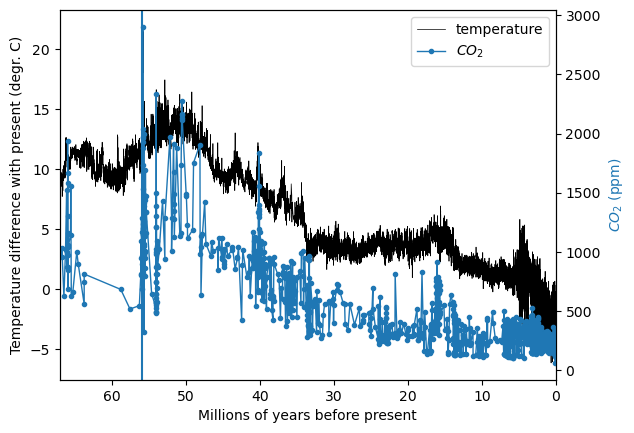

In [5]:
# create a figure
fig, ax = pl.subplots(1, 1)

# plot the paleotemperature data
l1, = ax.plot(dft["age_tuned"], dft["dTs"], label="Temperature", color="black", lw=0.5)

# create a second x-axis and plot the CO2 data
axr = ax.twinx()
l2, = axr.plot(dfc["ages"], dfc["CO2"], label=r"$CO_2$", marker=".", lw=1.0)

# add labels to the x and y-axis
axr.set_ylabel(r"$CO_2$ (ppm)", color="tab:blue")
ax.set_ylabel("Temperature difference with present (degr. C)")
ax.set_xlabel("Millions of years before present")

# flip the x-axis to make sure age left is old and right-hand side is young
ax.set_xlim(max_age, 0)

# add a legend
ax.legend([l1, l2], ["temperature", r"$CO_2$"])

ax.axvline(x=56.0)

By looking at the figure above we can make a first conclusion that the higher temperatures that our planet has experienced in the past were accompanied by much higher $CO_2$ levels in the atmopshere. However, the if we look in detail the relation between $CO_2$ and temperature looks a bit more complicated. To make sense of these data we will dive into a quantitative analysis in the remainder of this notebook

## 1.3 Joining the temperature and $CO_2$ data:

The paleotemperature and paleo-CO2 data are contained in different dataframes, called `dft` and `dfc`. Both have a quite different temporal resolution. Lets check how many datapoints each dataset has:

In [6]:
dft.shape, dfc.shape

((24259, 5), (1564, 28))

The `.shape` command above shows the size of the dataframes. The paleotemperature dataframe is by far the largest, with 24259 rows. The paleo-$CO_2$ dataframe is much smaller, with just 1564 rows.

Next we will merge the two datasets, by adding $CO_2$ data to the paleotemperature dataframe, and by adding paleotemperature to the $CO_2$ dataframe. This is necessary so that we can compare temperature and $CO_2$ values later on in this exercise.

We will also limit our analyses to the last 56.0 million years, because there are too few $CO_2$ datapoints for the time period before 56 million years to make any meaningful analysis.

In [7]:
# interpolate the CO2 values to the ages of the paleotemperature dataframe
co2_w = np.interp(dft["age_tuned"].values, dfc["ages"].values, dfc["CO2"].values)
dft["CO2"] = co2_w

# select the last 56 million years only
idx = dft["age_tuned"] < 56.0
dft = dft.loc[idx]

# interpolate the paleotemperatures to the ages in the paleoCO2 dataframe
T_c = np.interp(dfc["ages"].values, dft["age_tuned"].values, dft["GMST (oC)"])
dfc["dTs"] = T_c

# select the last 56 million years only
idx = dfc["ages"] < 56.0
dfc = dfc.loc[idx]

# get the oldest age in the dataset
max_age = dft["age_tuned"].max()

ok, now we're done with reading the data and merging the temperature and $CO_2$ data and we can proceed with doing some data analysis and science in the next sections of this exercise.

---

# Section 2: Analysing trends in temperature and $CO_2$ for the last 66 million years

We are first going to focus on analysis of the entire temperature and $CO_2$ history for the last 66 million years. This section follows the methods that you have learned in exercise 1a, it just applies them to a different dataset and a very different timescale.

# 2.1 Trends in paleotemperature

Lets first see if the trend that one can see in the temperature data figure that we made earlier is also statistically valid. We will apply a linear regression again. But before that we do this we will try something new, *a [non-parametric test](https://en.wikipedia.org/wiki/Nonparametric_statistics)*.


### 2.1.1 Non-parametric test

A non-parametric a test can be used to find out if there is any statistical trend at all in the data, without making an assumption whether this trend should be linear, powerlaw or otherwise. For climate data the best test method is the [Mann-Kendall test](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient), which, as usual, is [implemented in python in the library scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html). Below we use this test to check whether there is a correlation between geological age and temperature:


In [8]:
# import the scipy.stats module
import scipy.stats

# run the Mann-Kendall test on the paleotemperature data
mkt = scipy.stats.kendalltau(dft["age_tuned"], dft["dTs"])

# show the results of the Mann-Kendall test
print(mkt)

SignificanceResult(statistic=np.float64(0.782597796494182), pvalue=np.float64(0.0))


The result of the Mann-Kendall test above tells us that there is a positive correlation between age and paleotemperature with a correlation coefficient of 0.78. For reference, 0.0 would be no correlation and 1.0 would be a perfect correlation. This relation is also statistically valid, the null-hypothesis (that the correlation is due to random noise) has a probability of 0.0.

### 2.1.3: Which models are good and which is best?

Before we go further with analysing trends in the temperature data over the last 56 million years, we will first get to know two new metrics that can be used to evaluate how well a model fits the temperature data.

We saw in exercise 1a that we had several different models to quantify the long-term trend in the global temperature data. Each model had a different $R^2$ value. At first sight we might be tempted to simply select the model with the highest $R^2$ value as the best model. However this is not entirely a fair way of selecting the best model. Imagine if we had used the piecewise linear model, but had increased the amount of segments to 1000. After a lot of number crunching the algorithm would come up with a near perfect model, where almost every temperature datapoint has its own line segment that overlies each datapoint. This model will obviously have a very high $R^2$ that would be close to 1.0, because it fits the data perfectly. It however also requires a 1000 input parameter values. And its value in predicting future warming may be very limited, because these 1000 parameters are exactly tuned to the data but may not be very helpful in predicting future temperature. Such a model is a case of a model that is *overfitted* (https://en.wikipedia.org/wiki/Overfitting).

Form a science philosophy viewpoint, scientific models and theories should follow Occam's razor (https://en.wikipedia.org/wiki/Occam%27s_razor), which is usually summarized as "The simplest explanation is usually the best one". Or in our case, the model with the least unnecessary assumptions is the best one. Therefore, we should in principle select the simplest model that fits the data well, i.e. a good model with a low number of parameters. However this raises a question which model should be rated best, the simple linear regression with just two parameters, but a poor fit to the data, or a more complex model with more parameters, but a better fit?

To avoid overfitting we can resort to alternative metrics that take into account the complexity of a model. We will use two metrics here, the [Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) or AIC and the [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) or BIC. Both AIC and BIC take into account the model error or residual, i.e., how far off the model is from the data, and the number of parameters that a model requires.

The Akaike information criterion is calculated as follows:

$$AIC = N \ln \left( \dfrac{RSS}{N} \right)+ 2 K$$

where $N$ is the number of observations or datapoints, $K$ is the number of parameters and $RSS$ is the sum of the squared residuals, which is calculated by comparing each datapoint to the model prediction, squaring this and then summing all squared residuals:

$$RSS = \sum{(y_p - y)^2}$$

Where $y_p$ is the value predicted by the model and $y$ is the actual data. The Bayesian information criterion is calculated in a similar way, but with a slightly different weight for the importance of the number of parameters vs the model error:

$$BIC = N \ln \left( \dfrac{RSS}{N} \right)+ \ln{N} K$$

The BIC metric tends to assign a higher importance to the number of parameters (K) in most cases, because $\ln{N}$ is often higher than 2. For both metrics the model that has the lowest AIC or BIC score is the best, because both a high model error (RSS) or a high number of parameters (K) increase the score, and the ideal model has a low model error (i.e. a low difference between the prediction and the data), and a low number of parameters.

Feel free to use either of these two metrics in the rest of this exercise. There is an ongoing debate in the statistics community on which one is better, but for now it seems a matter of personal preference. If you want to read more about this you can check [this paper by Ding et al. (2018)](https://ieeexplore.ieee.org/abstract/document/8498082) (which is addmittedly not the easiest paper to read, but very informative).

We will first set up two functions to calculate AIC and BIC. Functions are small blocks of code that take in one or more variables, do something with these and then give back variables after they're done. In this case the functions takes the temperature data, the predicted values and the number of parameters, and then returns the AIC or BIC value

In [9]:
# set up two functions to calculate AIC and BIC

# the next line sets up a function called AIC that takes in three variables: data, prediction and number_of_params
def AIC(data, prediction, number_of_params):

    # the following line calculates the number of data points (N)
    N = len(data)

    # the following line calculates the residual sum of squares (RSS)
    RSS = np.sum((data - prediction)**2)

    # create a new variable K that is equal to number_of_params
    K = number_of_params

    # the following line calculates the AIC value
    # note that np.log(..) is the natural logarithm (base e)
    AIC_value = N * np.log(RSS / N) + 2 * K

    # the function then returns the calculated AIC value
    return AIC_value


def BIC(data, prediction, number_of_params):

    N = len(data)

    RSS = np.sum((data - prediction)**2)

    K = number_of_params

    # complete the line of code below to calculate BIC, and remove the #
    # see the formula in the notebook cell above, and see the AIC function above to check how to do this
    #BIC_value= ....

    return BIC_value

Next, we will test if the two functions work by calculating the AIC and BIC for two test cases. One in which a model fits the data perfectly (this actually never happens in geosciences, but its a test), and a second one in which the model prediction is completely random (this can actually happen in the geosciences, and means there is no relation between the model and the data). 

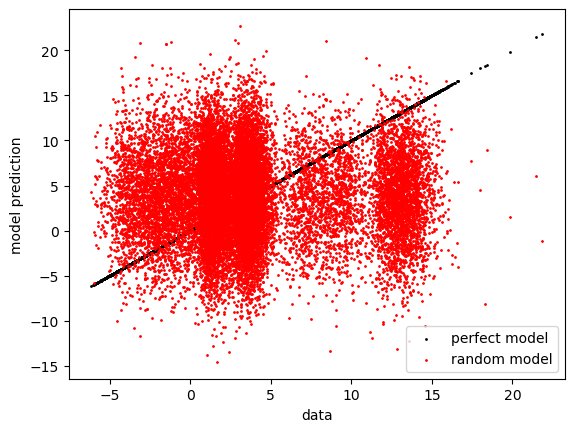

In [10]:
perfect_model = dft["dTs"] + 1e-6
# create a set of random numbers that follow a standard normal (Gaussian) distribution, with the same length as the temperature dataset
# see here for more info https://numpy.org/doc/2.2/reference/random/index.html#random-quick-start
rng = np.random.default_rng()
random_numbers = rng.standard_normal(len(dft))

# multiply with the standard deviation of the temperature data and add the mean of the temperature data
# np.std(..) calculates the standard deviation, np.mean(..) calculates the mean
random_model = random_numbers * np.std(dft["dTs"]) + np.mean(dft["dTs"])

fig, ax = pl.subplots(1, 1)
ax.scatter(dft["dTs"], perfect_model, label="perfect model", color="black", s=1)
ax.scatter(dft["dTs"], random_model, label="random model", color="red", s=1)

ax.set_xlabel("data")
ax.set_ylabel("model prediction")
ax.legend()

In [11]:
AIC_perfect = AIC(dft["dTs"], perfect_model, 1)
BIC_perfect = BIC(dft["dTs"], perfect_model, 1)

# print the AIC and BIC values below this code block:
print("AIC for the perfect model (lower is better) = ", AIC_perfect)
print("BIC for the perfect model (lower is better) = ", BIC_perfect)


AIC_random = AIC(dft["dTs"], random_model, 1)
BIC_random = BIC(dft["dTs"], random_model, 1)	
# print the AIC and BIC values below this code block:
print("AIC for the random model (lower is better) = ", AIC_random)
print("BIC for the random model (lower is better) = ", BIC_random)

NameError: name 'BIC_value' is not defined

you will notice that the code above will generate an error, because it is not complete yet. Your task in the next assignment is to complete the BIC function so that the code works and will not produce an error:

# ASSIGNMENT 2.1: Complete the BIC function

**Complete the BIC function above by completing the line where the BIC value is calculated (`#BIC = ...`) and adding the equation for the BIC value in place of the dots `...`.** After doing this rerun the code above to calculate the AIC and BIC values for the perfect and the random models

### 2.1.3 Linear regression

Now that we learned of a new way to decide how good models are, let's see if we can quantify this trend between temperature and time that we observed in section 2.1.1, with a linear regression:

In [ ]:
regr = scipy.stats.linregress(dft["age_tuned"], dft["dTs"])
print(regr)
print(f"R^2 = {regr.rvalue**2}")

The results of the linear regression that are in the output above, tell us that there is a significant linear trend, with a decrease in temperature of 0.2 degrees C per million years. Let's show this in a figure again:

In [ ]:
# calculate the temperature predicted by the regression model
dft["temperature_linear_model"] = dft["age_tuned"] * regr.slope + regr.intercept

# create a figure
fig, ax = pl.subplots(1, 1)

# plot the paleotemperature data
ax.plot(dft["age_tuned"], dft["dTs"], label="temperature data", color="black", lw=0.5)

# make a label for the figure legend
linregress_label = f"linear regression, y={regr.intercept:0.2f} + {regr.slope:0.2e} x \n"
linregress_label += fr"$R^2$={regr.rvalue**2:0.3f}, p={regr.pvalue:0.3f}"

# plot the result of the linear regression
ax.plot(dft["age_tuned"], dft["temperature_linear_model"], label=linregress_label)

# add labels to the x and y-axis
ax.set_ylabel("Temperature difference with present (degr. C)")
ax.set_xlabel("Millions of years before present")

# flip the x-axis to make sure age left is old and right-hand side is young
ax.set_xlim(max_age, 0)

# add a legend
ax.legend()

We will also calculate the [Akaike (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) and [Bayesian (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion) information criterions, as we did in exercise 1a, to be able to compare different models with each other. The AIC and BIC values weight the performance of models against their complexity. Simple models (with low numbers of parameters) and models that fit the data well get low scores, and vice versa. For both AIC and BIC lower scores are better.

In [ ]:
# calculate AIC and BIC
AIC_linear = AIC(dft["dTs"], dft["temperature_linear_model"], 2)
BIC_linear = BIC(dft["dTs"], dft["temperature_linear_model"], 2)

# print the AIC and BIC values:
print("AIC for the linear model (lower is better) = ", AIC_linear)
print("BIC for the linear model (lower is better) = ", BIC_linear)

### 2.1.4 Multi-linear model

Finally let us try out a multi-linear model. The bi-linear model was quite successful in explaining the trends in historic temperatures in exercise 1a. Lets see what it can do for us in quantifying trends in paleotemperatures.

We first import the [pwlf module](https://github.com/cjekel/piecewise_linear_fit_py) again that we need for the bi-linear model:

In [ ]:
%pip install pwlf

In contrast to exercise 1a, we will not only test the bi-linear model, but also models with more than two segments. For this we use a [for loop](https://github.com/dfbr/pythonLessons/blob/main/Lessons/loops.md) in the code block below. For more information on how for loops work you can revisit the Python workshop [here](https://github.com/dfbr/pythonLessons/blob/main/Lessons/loops.md).

Note that the code block below might take a while because it tests multiple models, and because fitting a model with many segments obviously has many possibilities on where these segments are placed, and testing those takes time.

Feel free to change the number of segments below by changing the numbers in the command `n_segments_list = np.arange(2, 5)`.

However, please note that the code becomes extremely slow for more than five segments. We are running against computational limits here, even though our model is relatively simple. To fix this we would need better modules than pwlf, to rewrite this in a faster programming language like Julia, Fortran, C or C++, or to use better computing infrastructure. Of course, this is all a bit outside of the scope of this introduction course, so we will limit ourselves to models with a low number of segments.

In [ ]:
# import the piecewise linear function module
import pwlf

# set up empty list to store the results later
AICs_pwlf = []
BICs_pwlf = []
R2s_pwlf = []

y_predicted_pwlfs = []

# get the x and y variables from the dataframe
x, y = dft["age_tuned"].values, dft["dTs"].values

# set up the model
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# create an array with the number of segments to try
n_segments_list = np.arange(2, 4)

# go through each item in the array in a for loop
for n_segments in n_segments_list:

  # fit the model to the data
  # change the number between brackets to change the number of line segments
  results_pwlf = my_pwlf.fit(n_segments)

  # get the results
  #b, a = results_pwlf

  # get the predicted values
  y_predicted = my_pwlf.predict(x)

  print(f"\nTrying out a linear model with {n_segments} segments")
  print(f"The parameters for the fitted piecewise linear model are {my_pwlf.beta}")

  # calculate the coefficient of determination (R2)
  import sklearn.metrics
  R2_pwlf = sklearn.metrics.r2_score(y, y_predicted)
  print(f"the R2 score for the piecewise linear model is {R2_pwlf}")

  # calculate the AIC and BIC values
  AIC_pwlf = AIC(y, y_predicted, n_segments)
  BIC_pwlf = BIC(y, y_predicted, n_segments)
  print("AIC for the piecewise linear model (lower is better) = ", AIC_pwlf)
  print("BIC for the piecewise linear model (lower is better) = ", BIC_pwlf)

  # store all the results in lists
  AICs_pwlf.append(AIC_pwlf)
  BICs_pwlf.append(BIC_pwlf)
  R2s_pwlf.append(R2_pwlf)
  y_predicted_pwlfs.append(y_predicted)


Next we will visualize how well the models with the different number of segments did:

In [ ]:
# create a new figure
fig, axs = pl.subplots(2, 1, figsize=(8, 8))

# add a new y-axis on the right
axr = axs[0].twinx()

# plot the AIC and BIC vs the number of segments
la, = axs[0].plot(n_segments_list[:len(AICs_pwlf)], AICs_pwlf, label="AIC", lw=2.0)
lb, = axs[0].plot(n_segments_list[:len(BICs_pwlf)], BICs_pwlf, label="BIC", ls="--")

# plot the R2 value vs the number of segments
lr, = axr.plot(n_segments_list[:len(R2s_pwlf)], R2s_pwlf, color="gray", ls="--")

# add labels to the axes
axr.set_ylabel(r"$R^2$", color="gray")
axs[0].set_ylabel("AIC / BIC")
axs[0].set_xlabel("Number of segments")

# add a legend
axs[0].legend([la, lb, lr], ["AIC", "BIC", r"$R^2$"])

## second subplot with the different models

# plot paleotemperature
axs[1].plot(dft["age_tuned"], dft["dTs"])

# go through the predicted temeprature list for the different models
for y_prediced_pwlf, n_segment in zip(y_predicted_pwlfs, n_segments_list):

  # plot the predicted temperature
  axs[1].plot(dft["age_tuned"], y_prediced_pwlf, label=f"{n_segment} segments")

# add a legend
axs[1].legend()

# add labels to the x and y-axis
axs[1].set_ylabel("Temperature difference with present (degr. C)")
axs[1].set_xlabel("Millions of years before present")

# flip the x-axis to make sure age left is old and right-hand side is young
axs[1].set_xlim(max_age, 0)

In [ ]:
BICs_pwlf

Its clear from the figure above that models with more parameters / segments do better in reproducing trends in paleoclimate data over the last 66 million years. So in this case one could say that complicated models are better. Note that this is often not the case in earth science, simple models often perform better than more complicated models.

## 2.2 Correlation between $CO_2$ and paleotemperature

Next, lets see what causes this long-term decline in temperature on earth. We saw in exercise 1a that temperature and $CO_2$ are closely correlated in the historic temperature and $CO_2$ data, which is not surprising because $CO_2$ is a powerful [greenhouse gas](https://en.wikipedia.org/wiki/Greenhouse_gas). Lets look at the $CO_2$ and paleotemperature data for the last 66 million years to see if this correlation can also be found in the older data:  

We first perform linear regressions between temperature and $CO2$. In principle we should perform these regressions twice, one on the paleotemperature dataframe `dft`, which had a very dense time-interval, and one on the CO2 dataframe `dfc`, which only had one datapoint every 100,000 years. However, to keep things simple we will only use the $CO_2$ dataframe `dfc` here:

In [ ]:
# perform the linear regression between CO2 (dfc["CO2"]) and paleotemperature (dfc["dTs"])
regr_CT = scipy.stats.linregress(dfc["CO2"], dfc["dTs"])

# show the results
print("Regression results: ", regr_CT)
print("The coefficient of determination for this regression is ", regr_CT.rvalue**2)

As you can see in the results above, $CO_2$ and temperature are also correlated on geological timescales, with a high coefficient of determination, and a low p-value for the null-hypothesis. Let's visualize the relation between $CO_2$ and temperature:

In [ ]:
# calculate the regression line between CO2 and paleotemperature
CO2_plot = np.linspace(dft["CO2"].min(), dft["CO2"].max(), 101)
T_plot = regr_CT.slope * CO2_plot + regr_CT.intercept

# uncomment and complete the following lines to calculate the regression line
# for historic CO2 vs temperature
# add the values for slope (a) and intercept (b) from exercise 1a here
#a =
#b =
# calculate the regression for historic temperature
#T_plot_historic = a * CO2_plot + b

# create a figure
fig, axs = pl.subplots(1, 2, sharey=True)

# plot the CO2 and temperature data in the temperature dataframe
sc1 = axs[0].scatter(dft["CO2"], dft["dTs"], c=dft["age_tuned"], s=3)

# plot the CO2 and temperature data in the CO2 dataframe
sc2 = axs[1].scatter(dfc["CO2"], dfc["dTs"], c=dfc["ages"], s=3)

# add the regression lines to each plot
for ax in axs:
  ax.plot(CO2_plot, T_plot, label="Cenozoic")

  # uncomment the following line to show historic CO2 vs temperature regression
  #ax.plot(CO2_plot, T_plot_historic, label="1980-2023")

# add labels
for ax in axs:
  ax.set_xlabel(r"$CO_2$ (ppm)")

axs[0].set_ylabel(r"Temperature anomaly")

# add a legend
axs[1].legend()

# add a colorbar
cb = fig.colorbar(sc2, ax=axs, orientation="horizontal")
cb.set_label("Age (Ma)")

# ASSIGNMENT 2.2: Add the historic CO2 vs temperature curve

We have calculated the correlation between CO2 and temperature before in section 7 of exercise 1a. It would be interesting to see how the correlation that we found there compares to the one for the Cenozoic that we have calculated above.

**Try to uncomment (remove #) and complete the lines in the code block above to add the historic CO2 vs temperature correlation to the figure above. Insert the values of slope (a) and intercept (b) of the regression between CO2 and temperature that you found in exercise 1a**



# ASSIGNMENT 2.3: Compare the relation between CO2 and temperature in historic and paleoclimate data

**Write a short text below to discuss if and how the historic and Cenozoic temperature vs CO2 correlations differ**


---

***Add your answer to Assignment 2.2 here...***

---

## 2.2 A $CO_2$-based paleotemperature model

As we have done in exercise 1a, we can use the correlation between CO2 and temperature to generate a model of paleotemperature. Below we first calculate the predicted temperature based on the results of the linear regression, and we then calculate the coefficient of determination ($R^2$) and the mean absolute error (MAE) to evaluate how well this model can predict paloetemperature:

In [ ]:
import sklearn.metrics

# calculate a model paleotemperature using the linear regression between temperature
# and CO2
dft["predicted_temperature"] = dft["CO2"] * regr_CT.slope + regr_CT.intercept

# calculate the mean absolute error for the temperature model
MAE_CT = np.mean(np.abs((dft["predicted_temperature"] - dft["dTs"])))

# calculate the coefficient of determination for the modelled temperature
R2_CT = sklearn.metrics.r2_score(dft["dTs"].values, dft["predicted_temperature"].values)

# calculate the coefficient of determination for the modelled temperature
AIC_CT = AIC(dft["dTs"].values, dft["predicted_temperature"].values, 3)
BIC_CT = BIC(dft["dTs"].values, dft["predicted_temperature"].values, 3)

# report the mean absolute error, the R2 value, AIC and BIC
print(f"Mean absolute error for the CO2-based paleotemperature model = {MAE_CT} degrees C")
print(f"R^2 for the CO2-based paleotemperature model = {R2_CT}")
print(f"AIC for the CO2-based paleotemperature model = {AIC_CT}")
print(f"BIC for the CO2-based paleotemperature model = {BIC_CT}")


Before we proceed, lets first visualize our new paleotemperature model.

In [ ]:
# create a figure
fig, ax = pl.subplots(1, 1)

# plot the paleotemperature data
lt, = ax.plot(dft["age_tuned"], dft["dTs"], color="black", lw=0.5)

# plot the modelled temperature
lm, = ax.plot(dft["age_tuned"], dft["predicted_temperature"],
        color="tab:orange", lw=1.0)

# create a second x-axis and plot the CO2 data
axr = ax.twinx()
lc, = axr.plot(dfc["ages"], dfc["CO2"], label=r"$CO_2$", color="tab:blue", lw=1.0)

# add labels to the x and y-axis
axr.set_ylabel(r"$CO_2$ (ppm)", color="tab:blue")
ax.set_ylabel("Temperature difference with present (°C)")
ax.set_xlabel("Millions of years before present")

# flip the x-axis to make sure age left is old and right-hand side is young
ax.set_xlim(max_age, 0)

# add a legend:
label1 = "Reconstructed temperature"
label2 = r"$CO_2$"
label3 = "Modelled temperature,\n"
label3 += fr"MAE={MAE_CT:0.1f}°C, $R^2$={R2_CT:0.2f}"
ax.legend([lt, lc, lm], [label1, label2, label3])

As you can see in the output below the code blocks above, the $CO_2$-based temperature model has a decent $R^2$ value. However, visually the fit of the temperature model to the data does not look great, and the mean absolute error is relatively high. In addition, the model performs worse than other models in section 2.1, because it shows higher values of AIC and BIC.

The reason for the poor performance of the model can be seen in the cross-plot figure of temperature and $CO_2$ in section 2.2. There are sections where temperature and $CO_2$ are strongly correlated. However, there are also parts of the figure where the data seem to follow a horizontal line, where $CO_2$ changes, but temperature does not react. These regions where climate remains stable in spite of changes in $CO_2$ cluster around temperatures of 4 degrees and 13 degrees.

# ASSIGNMENT 2.4: Answer research questions on paleoclimate

In the sections 2 and 3 we have learned quite a number of things about paleoclimate in the last 56 million years. Here you will try to summarize these findings by answering a number of research questions on paleoclimate. **Try to answer each of the research questions below**:

1. Is there a long-term trend in climate in the last 56 million years?
2. What model best describes the long-term trend of paleoclimate?
3. What is the relation between climate and $CO_2$ in the Cenozoic?
4. To what extent can changes in $CO_2$ explain climate change in the Cenozoic?
5. Is the relation between $CO_2$ and climate similar or different than in the historic dataset from exercise 1a?

Provide your answer in the text block below. **Motivate your answers** and explain how the data analysis that was performed in section 2 and 3 supports your answer. Note that you are not expected to start new analyses to answer these questions (although you are welcome to expand the analyses if you like of course).

---

***Add your answer to the research questions from Assignment 2.4 here. Make sure to give each answer the same number as the corresponding question, and write each answer in a separate paragraph, separated from the preceding paragraph by an empty line***

---

# ASSIGNMENT 2.5 (optional): Research questions on the processes that control paleoclimate

***Note: this assignment is not compulsory, but provides an extra challenge if you have time left in this exercise.***

If all went well you have answered a number of research questions about Cenozoic climate in the previous assignment. However, these answers still leave a major underlying question unanswered, why did Cenozoic climate change the way it did? We can go one step further and combine your analysis with a search of the scientific literature to try to answer this question. To make things a bit easier, we will split our research into two different questions:

1. What can explain the trend in paleotemperature in the Cenozoic?
2. What can explain the relation between $CO_2$ and paleotemperature in the Cenozoic?

These are all quite difficult questions to answer, but we do not have to answer these questions fully here, any progress we can make towards finding an answer is good.

Thankfully the scientific literature does contain some answers to these questions. So let's try to use and learn from the work that other researchers have done on these questions.

You may be surprised (or not), that the most practical way to start to look for answers to these research questions is to fist check Wikipedia (for example see "Climate" [here](https://en.wikipedia.org/wiki/Cenozoic)) or Copilot.

The answers that Wikipedia or Copilot they provide are based on scientific research. The main way for researchers to share their findings is by describing these findings in [scientific papers](https://en.wikipedia.org/wiki/Academic_publishing#Scholarly_paper). Wikipedia or Copilot will provide you with links or citations of these papers. You can also search for these papers yourself, using a specialized scientific search website like [https://scholar.google.com/](https://scholar.google.com/).

For this particular question two very helpful scientific papers are [Zachos et al. (2001)](https://doi.org/10.1126/science.1059412) and [Westerhold et al. (2022)](https://doi.org/10.1126/science.aba6853).

To avoid spending too much time on reading these papers I would suggest reading the abstract and conclusions, and having a look at the figures first, to see if they actually discuss something that you need. And only then try to go through the text if you need more information.

Make sure to give each answer the same number as the corresponding question, and write each answer in a separate paragraph, separated from the preceding paragraph by an empty line*

---

***Add your answer to the research questions of bonus assignment 2.5 here***

---

# Section 3: Climate change in the Quaternary


In this section we will confine our data analysis to a short, but important geological period, the Quaternary. This period started 2.58 million years ago, and we currently still live in this period.

We currently (thankfully) live in the Holocene, which is an interglacial, a period in the Quaternary with relatively high temperatures and a low coverage of ice sheets. The Quaternary was dominated by rhythmic changes between glacial stages, where large parts of Norway were covered by ice sheets, and interglacials.

In this part of the exercise we will analyze paleo-temperature and paleo-$CO_2$ data from the Quaternary to study climate change in geological history.

In contrast to the earlier sections of this notebook, for this notebook you will perform most of the analyses yourself. However, the code that you need for this is already contained in section 2 and 3. You only need to copy the code and make a minor adjustment so that you apply this code to study the Quaternary, instead of the entire 56 million year history of the earth.

## 3.1: Research questions on Quaternary climate history

In this part of this exercise we will try to answer the following research questions:

1. Is there a long-term trend in Quaternary climate?
2. What model best describes the long-term trend of Quaternary climate?
3. What is the relation between climate and $CO_2$ in the Quaternary?
4. To what extent can changes in $CO_2$ explain climate change in the Quaternary?
5. Is the relation between $CO_2$ and climate similar or different than in the historic dataset from exercise 1a or the Cenozoic data?

## 3.2 Selecting data for your geological timeslice

To analyse the climate history of the Quaternary, we first have to select the data only for the Quaternary. We will do this both for the paleotemperature dataframe `dft` and the paleo-CO2 dataframe `dfc` in the code block below. The code below will limit these two datasets to the time period between 0 and `max_age`

In [ ]:
# set the maximum age that we want to keep in the new dataset
#max_age = ....

# select part of the temperature dataset
idx = dft["age_tuned"] < max_age
dft = dft.loc[idx]

# select part of the CO2 dataset for the same time period
idx = dfc["ages"] < max_age
dfc = dfc.loc[idx]

# ASSIGNMENT 3.1: Selecting data from the Quaternary only

Look up the age of the Quaternary, uncomment (remove #) the line containing max_age and make sure that the code above limits the data to the Quaternary

# ASSIGNMENT 3.2: Redo the trend analyses for the Quaternary

1. **The next assignment is to first copy-paste all code blocks from section 2 below.** You can find the commands to copy and past code blocks (or cells as google colab calls them) under Edit at the top of this notebook. Note that you can select multiple code blocks by holding the shift key. **Make sure that the code blocks are in the same order as in section 2**
2. **Redo all analyses that you have done for the Quaternary only by running the code blocks that you have pasted and updated below.**


# ASSIGNMENT 3.3: Answer the research questions

Now that you have finished the data analysis of Quaternary climate, let's see what we can learn from the results of the analysis. **Formulate an answer for each of the research questions of section 3.1 in the text block below**. Base all your answer on the results of your analysis of the data.

---

***Add your answer to the research questions from section 3.1 here. Make sure to give each answer the same number as the corresponding question, and write each answer in a separate paragraph, separated from the preceding paragraph by an empty line***

---

# ASSIGNMENT 3.4 (optional): Research questions on the processes that control Quaternary climate

***Note: this assignment is not compulsory, but provides some extra challenge if you have time left in this exercise.***

If all went well you have answered a number of research questions about Quaternary climate in the previous assignment. However, these answers still leave a major underlying question unanswered, why did Quaternary climat echange the way it did? We can go one step further and combine your analysis with a search of the scientific literature to try to answer this question. To make things a bit easier, we will split our research into three different questions:

1. What can explain the trend or absence of trends in paleotemperature in the Quaternary?
2. What can explain the relation between $CO_2$ and paleotemperature in the Quaternary?

These are all quite difficult questions to answer, but we do not have to answer these questions fully here, any progress we can make towards finding an answer is good.

Thankfully the scientific literature does contain some answers to these questions. So let's try to use and learn from the work that other researchers have done on these questions.

You may be surprised (or not), that the most practical way to start to look for answers to these research questions is to fist check Wikipedia (for example see "Climate" [here](https://en.wikipedia.org/wiki/Quaternary)) or Copilot.

The answers that Wikipedia or Copilot they provide are based on scientific research. The main way for researchers to share their findings is by describing these findings in [scientific papers](https://en.wikipedia.org/wiki/Academic_publishing#Scholarly_paper). Wikipedia or Copilot will provide you with links or citations of these papers. You can also search for these papers yourself, using a specialized scientific search website like [https://scholar.google.com/](https://scholar.google.com/).

For this particular question two very helpful scientific papers are [Lisiecki and Raymo (2007)](https://doi.org/10.1016/j.quascirev.2006.09.005) and [Herbert (2023)](https://doi.org/10.1146/annurev-earth-032320-104209).

To avoid spending too much time on reading these papers I would suggest reading the abstract and conclusions, and having a look at the figures first, to see if they actually discuss something that you need. And only then try to go through the text if you need more information.

---

***Add your answer to the research questions of bonus assignment 4.4 here. Make sure to give each answer the same number as the corresponding question, and write each answer in a separate paragraph, separated from the preceding paragraph by an empty line***

---

# Done!

That's it, you have finished this exercise. We hope you enjoyed this one. In the process you have looked back into geological history, learned how temperature and $CO_2$ history are reconstructed, looked at trends in Cenozoic and Quaternary climate, and tried to explain these. In addition, you have improved your data analysis skills and added non-parametric correlation tests to your portfolio. And finally you have seen the Python code to do this, which you can recycle in the future for your own research or data analysis project.

Next week we will start a new exercise in which we will look at earthquake data from the subsurface. Here we will learn more about earthquakes, the structure of the upper part of the earth's subsurface. And we will learn even more data analysis skills. See you next thursday!